In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import tensorflow as tf

In [2]:
# Load Data
train_load = np.load("utils\\train.npz")
test_load = np.load("utils\\test.npz")

x_train = train_load['x']
y_train = train_load['y']

x_test = test_load['x']
y_test = test_load['y']

Neutral


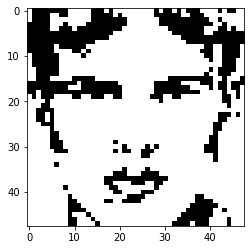

In [3]:
# Lets test the syncronization of label and image
dir_path = glob.glob("dataset" + "\*")

string_label = []
for string in dir_path:
    string_label.append(string.split("\\")[1])
    
plt.imshow(x_train[33769])
print(string_label[y_train[33769]])

In [4]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

y_test.shape

(7068, 6)

In [5]:
# Convert Everything to tensor
x_train = tf.convert_to_tensor(x_train)
x_test  = tf.convert_to_tensor(x_test)

y_train = tf.convert_to_tensor(y_train)
y_test  = tf.convert_to_tensor(y_test)

In [37]:
def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(48, 48, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', kernel_initializer="he_uniform"),
        tf.keras.layers.Conv2D(64, (2, 2), activation='relu', kernel_initializer="he_uniform"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        
        #tf.keras.layers.Dropout(0.1),
        #tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(64, (2, 2), activation='relu', kernel_initializer="he_uniform"),
        tf.keras.layers.Conv2D(64, (2, 2), activation='relu', kernel_initializer="he_uniform"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation="softmax")
    ])

def create_model_with_adam():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(48, 48, 3)),
        
        tf.keras.layers.Conv2D(16, (2, 2)),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Conv2D(16, (2, 2)),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
      
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Conv2D(32, (2, 2)),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Conv2D(32, (2, 2)),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(48, kernel_initializer='glorot_normal'),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dense(48, kernel_initializer='glorot_normal'),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dense(64, kernel_initializer='glorot_normal', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dense(80, kernel_initializer='glorot_normal', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dense(128, kernel_initializer='glorot_normal', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Activation("relu"),
        
        tf.keras.layers.Dense(6, activation="softmax")
    ])

In [38]:
import gc
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import Callback

class ClearMemory(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        k.clear_session()

In [39]:
#model = create_model()
model = create_model_with_adam()

#opt = tf.keras.optimizers.SGD(learning_rate=0.00001)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 16)        208       
_________________________________________________________________
activation (Activation)      (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 16)        1040      
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        2

In [40]:
history = model.fit(
    x_train,
    y_train,
    steps_per_epoch=16,
    validation_steps=8,
    epochs=50,
    callbacks=ClearMemory(),
    use_multiprocessing=False,
    workers=2,
    validation_data=(x_test, y_test)
)

Epoch 1/70
16/16 [==============================] - 30s 2s/step - loss: 1.7835 - accuracy: 0.2473 - val_loss: 1.7783 - val_accuracy: 0.2551
Epoch 2/70
16/16 [==============================] - 30s 2s/step - loss: 1.7554 - accuracy: 0.2572 - val_loss: 1.7202 - val_accuracy: 0.2668
Epoch 3/70
16/16 [==============================] - 31s 2s/step - loss: 1.7076 - accuracy: 0.2917 - val_loss: 1.6724 - val_accuracy: 0.3220
Epoch 4/70
16/16 [==============================] - 31s 2s/step - loss: 1.6649 - accuracy: 0.3172 - val_loss: 1.6395 - val_accuracy: 0.3413
Epoch 5/70
16/16 [==============================] - 31s 2s/step - loss: 1.6318 - accuracy: 0.3366 - val_loss: 1.6019 - val_accuracy: 0.3608
Epoch 6/70
16/16 [==============================] - 30s 2s/step - loss: 1.6010 - accuracy: 0.3528 - val_loss: 1.5772 - val_accuracy: 0.3785
Epoch 7/70
16/16 [==============================] - 30s 2s/step - loss: 1.5731 - accuracy: 0.3680 - val_loss: 1.5507 - val_accuracy: 0.3896
Epoch 8/70
16/16 [==

16/16 [==============================] - 29s 2s/step - loss: 1.2566 - accuracy: 0.5104 - val_loss: 1.3305 - val_accuracy: 0.4853
Epoch 60/70
16/16 [==============================] - 30s 2s/step - loss: 1.2486 - accuracy: 0.5147 - val_loss: 1.3123 - val_accuracy: 0.4932
Epoch 61/70
16/16 [==============================] - 29s 2s/step - loss: 1.2478 - accuracy: 0.5146 - val_loss: 1.3301 - val_accuracy: 0.4857
Epoch 62/70
16/16 [==============================] - 31s 2s/step - loss: 1.2449 - accuracy: 0.5174 - val_loss: 1.3233 - val_accuracy: 0.4895
Epoch 63/70
16/16 [==============================] - 31s 2s/step - loss: 1.2385 - accuracy: 0.5188 - val_loss: 1.3248 - val_accuracy: 0.4905
Epoch 64/70
16/16 [==============================] - 30s 2s/step - loss: 1.2329 - accuracy: 0.5240 - val_loss: 1.3105 - val_accuracy: 0.4934
Epoch 65/70
16/16 [==============================] - 29s 2s/step - loss: 1.2363 - accuracy: 0.5205 - val_loss: 1.3242 - val_accuracy: 0.4890
Epoch 66/70
16/16 [======

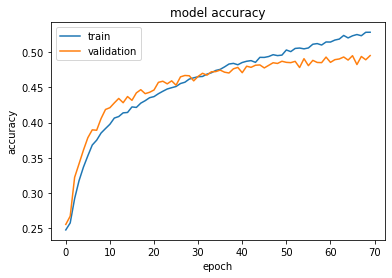

In [41]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig1.savefig('history/accuracy22.jpg')

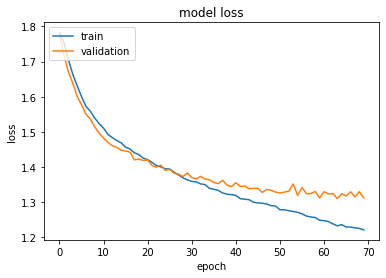

In [42]:
fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig2.savefig('history/loss22.jpg')

In [43]:
score = model.evaluate(x_test, y_test, verbose=2)
acc_str = "Accuracy : {} %".format(str(score[1] * 100))
acc_loss = "Loss : {}".format(str(score[0]))
print(acc_str)
print(acc_loss)

221/221 - 1s - loss: 1.3122 - accuracy: 0.4953
Accuracy : 49.53310787677765 %
Loss : 1.3121731281280518


In [44]:
# Save notepad data
with open('history/model_summary22.txt','w') as h:
    model.summary(print_fn=lambda x: h.write(x + '\n'))
    h.write(acc_str + '\n' + acc_loss)

In [45]:
model.save('history/model22.h5')

In [21]:
#mod = tf.keras.models.load_model('history/model13.h5')